<a href="https://colab.research.google.com/github/zzwony/Start_0920/blob/main/01_04_object_detection_classifyvideo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# number of appearances: 프레임이 50프레임 이상이면 나타나게 하는 숫자 지정하는 것
# project: 결과를 저장하는것

# 사용자 함수를 만들기
# rb는 이진으로 읽겠다.
# 소스는 읽어온것을 인코딩해서(b64encode) 해서 다시 디코딩하고 소스를 추가함
# HTML에다가 적용을 해서 return을 해줌
# 이렇게 기존 파일을 읽어서 프레임을 하는 과정이다.
# 여기에 가져온 비디오를 넣어주면 된다.

# 우리가 디텍트를 해야한다.
# 지정한 옵션을 넣어서 디텍트 하면 적용된다.
# 밑에 내리면 결과를 어디에 저장했는지 나온다.

# 결과를 보기 위해서 
# shutil.copy는 복사해서 붙여넣는것이다.
# 학습해서 처리한 걸 traffic_output으로 구글 드라이브에 보낸다.

# 끝!

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Install

In [2]:
%cd /content
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -qr requirements.txt

import torch
import os

/content
Cloning into 'yolov5'...
remote: Enumerating objects: 14927, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 14927 (delta 7), reused 7 (delta 1), pack-reused 14908
Receiving objects: 100% (14927/14927), 14.01 MiB | 9.11 MiB/s, done.
Resolving deltas: 100% (10246/10246), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 74.1 MB/s eta 0:00:00


In [3]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')
model_classes = model.names

/usr/local/lib/python3.8/dist-packages/torch/hub.py:267: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-1-4 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)



  0%|          | 0.00/14.1M [00:00<?, ?B/s]


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


### Example

In [23]:
VIDEO = '/content/drive/MyDrive/traffic.mp4'        # video example for analysis
DETECT = '/content/yolov5/detect.py'    # path to Yolo detect.py
IMG_WIDTH = 200                # compreesing video to speed up calculations
CONFIDENCE = 0.4               # confidence threashold for object detection #0.25 - standard
NUMBER_OF_APPEARANCES = 50     # an object describe the video if it appears in more than 50 frames (= 2 sec)
PROJECT = 'example_project'    # project directory to save result
NAME = 'example'               # project directory to save result                                   # project directory to save result

In [24]:
from IPython.display import HTML
from base64 import b64encode

def play(filename):
  html = ''
  video = open(filename, 'rb').read()
  src ='data:video/mp4;base64,' +b64encode(video).decode()
  html + '<video width=330 controls autoplay loop><source src ="%s" type="video/mp4"></video>' %src
  return HTML(html)


play(VIDEO) 

#### base 64란?
https://devuna.tistory.com/41

In [25]:
!python $DETECT --source $VIDEO --save-txt --img $IMG_WIDTH --project $PROJECT --name $NAME --conf-thres $CONFIDENCE

detect: weights=yolov5s.pt, source=/content/drive/MyDrive/traffic.mp4, data=data/coco128.yaml, imgsz=[200, 200], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=example_project, name=example, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-56-gc0ca1d2 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
WARNING ⚠️ --img-size [200, 200] must be multiple of max stride 32, updating to [224, 224]
video 1/1 (1/3600) /content/drive/MyDrive/traffic.mp4: 128x224 6 cars, 11.9ms
video 1/1 (2/3600) /content/drive/MyDrive/traffic.mp4: 128x224 6 cars, 9.5ms
video 1/1 (3/3600) /content/drive/MyDrive/traffic.mp4: 128x224 7 cars, 8.2ms
video 1/1 (4/3600) /content/drive/MyDr

### Result

In [26]:
import shutil
shutil.copy('/content/drive/MyDrive/traffic.mp4','/content/drive/MyDrive/traffic_output.mp4')

'/content/drive/MyDrive/traffic_output.mp4'

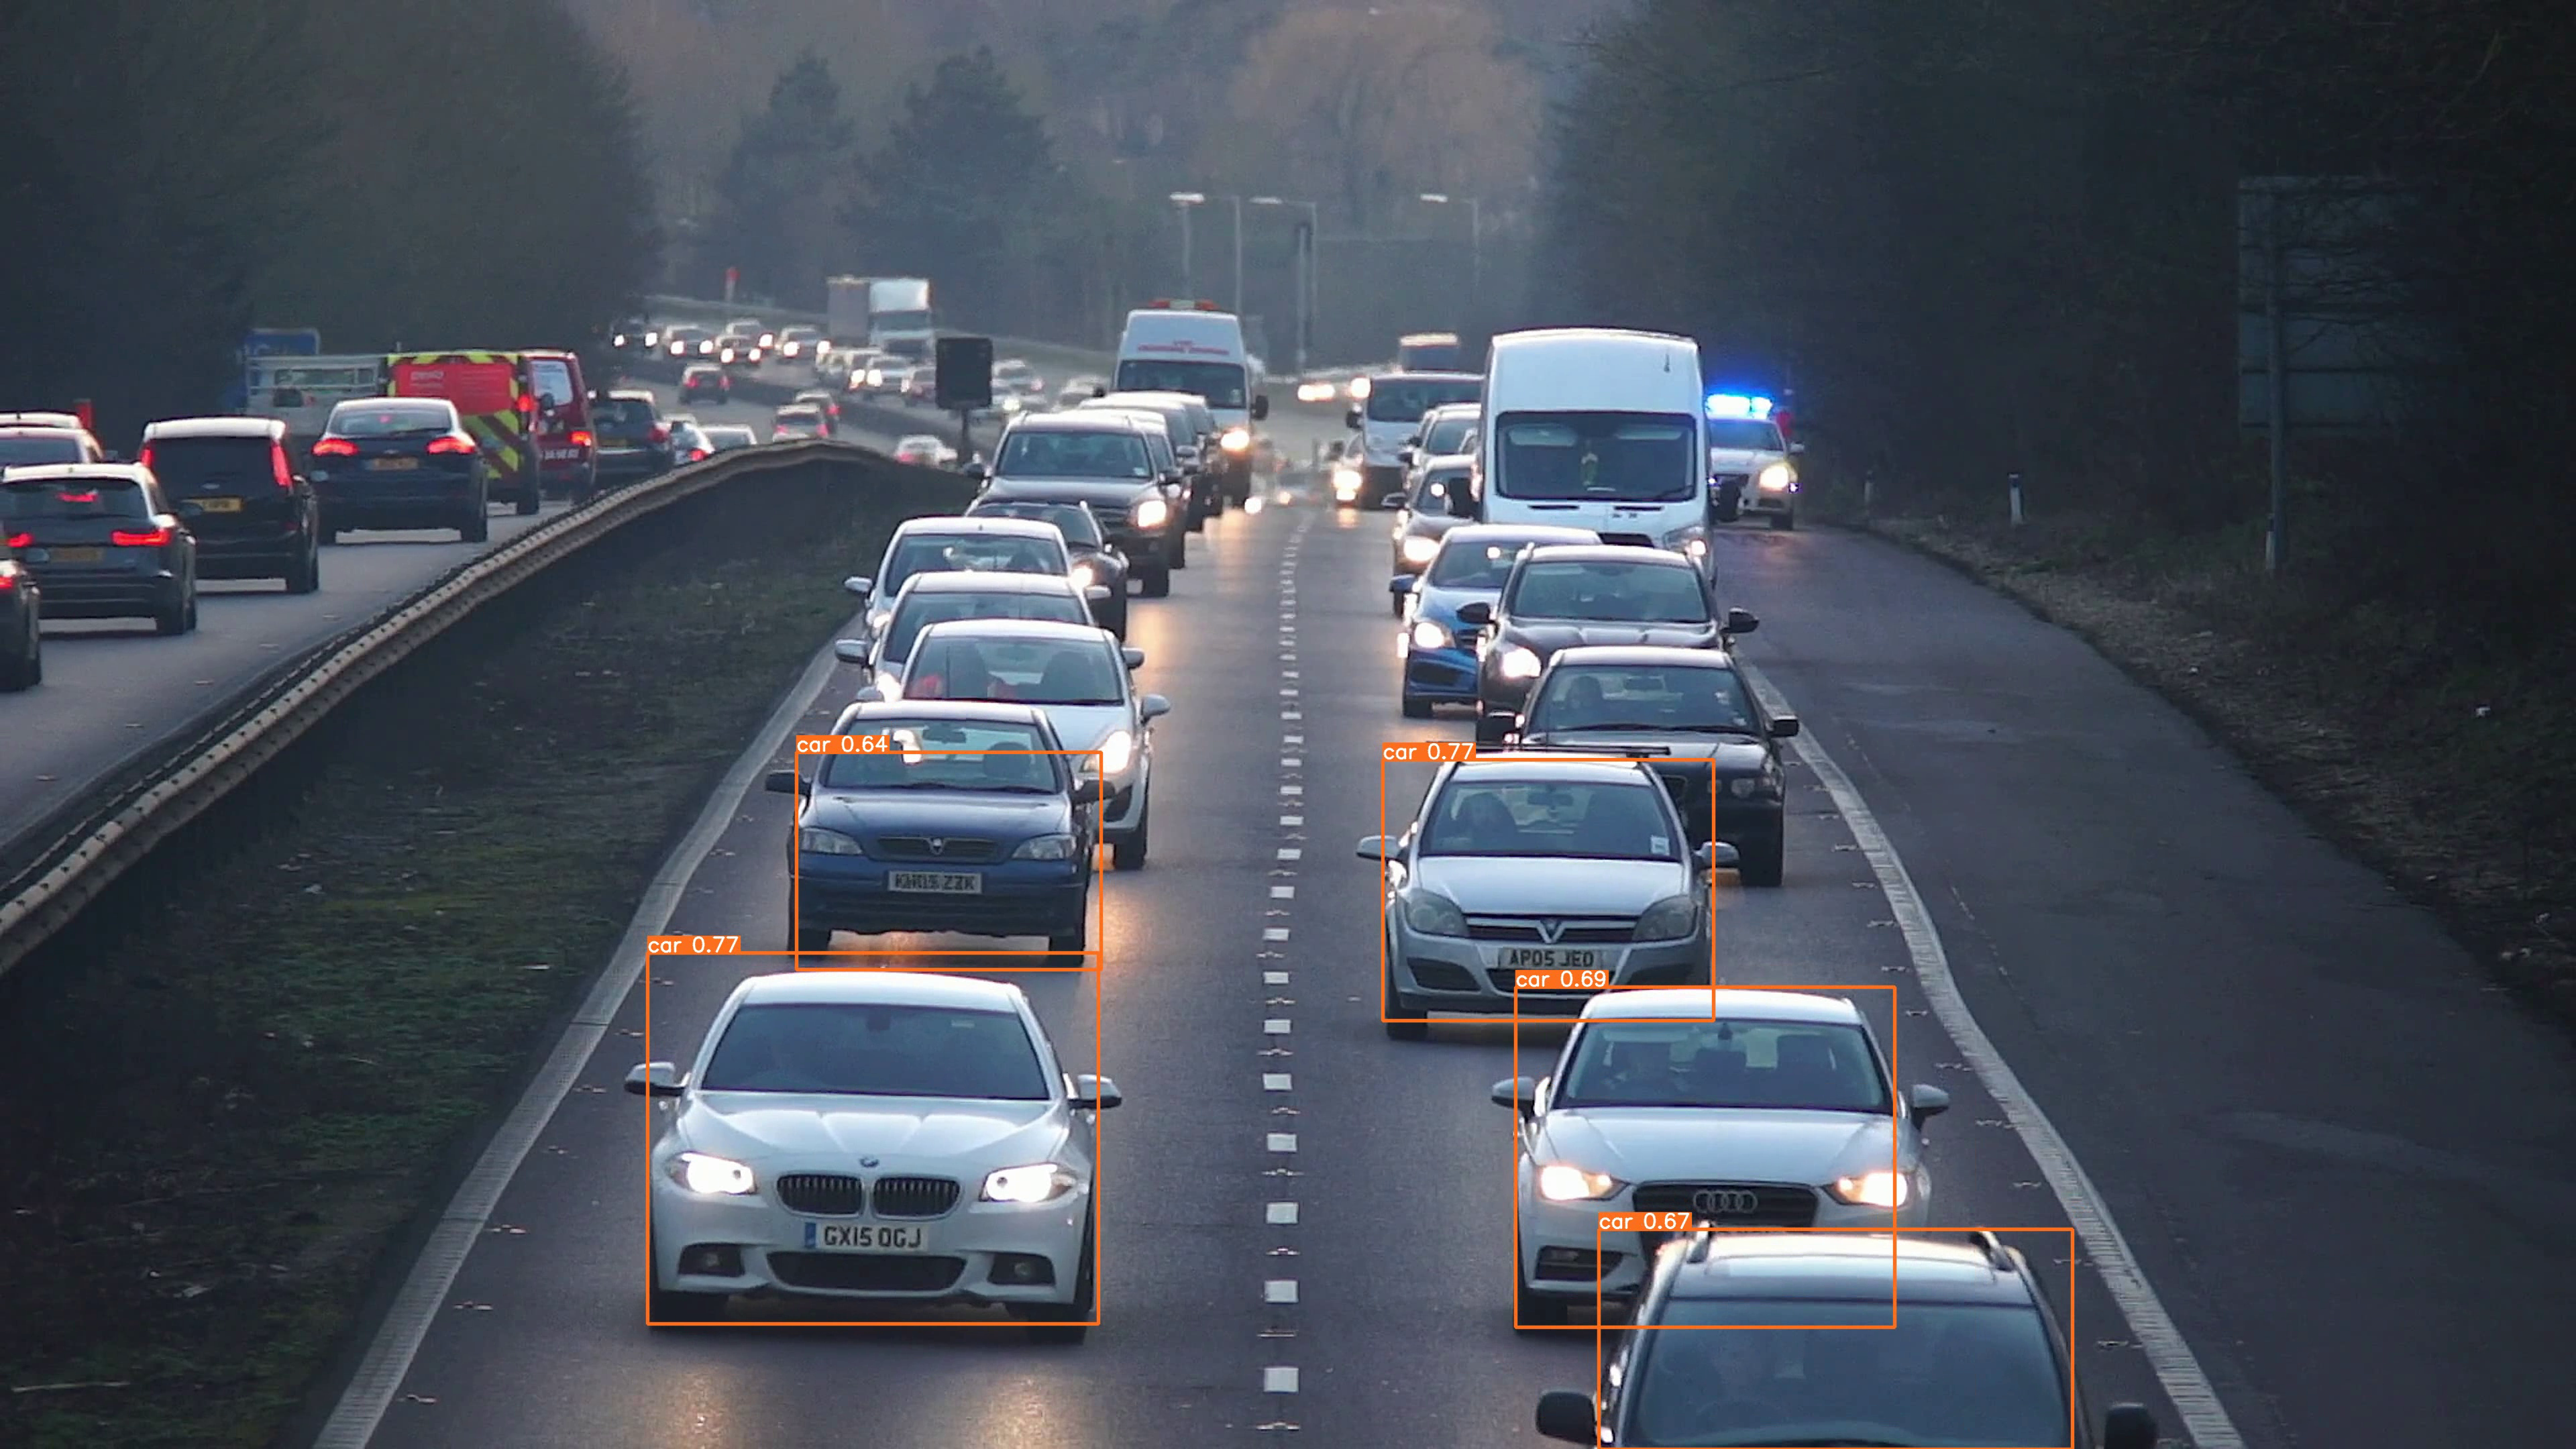

In [27]:
import cv2
from IPython.display import Image

frame_number = 210
filename =f'./{PROJECT}/{NAME}/traffic.mp4'
cap = cv2.VideoCapture(filename)
cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)
res, frame =cap.read()
cv2.imwrite('frame.png', frame)
Image("frame.png")